# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [44]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_t, y_t), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [45]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [46]:
# Your Code Here
print("x train " , x_t.shape) # cotains dimensions of image
print(" y train" ,y_t.shape)
print("x test ", x_test.shape)
print("y test ", y_test.shape)

print (" no of classes ", len(class_names))



x train  (50000, 32, 32, 3)
 y train (50000, 1)
x test  (10000, 32, 32, 3)
y test  (10000, 1)
 no of classes  100


### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [48]:
# Your Code Here
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


x_train_normalized = x_t.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# 2. One-hot encode labels
y_t_one_hot = to_categorical(y_t,len(class_names))
y_test_one_hot = to_categorical(y_test, len(class_names))



# 3. Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_normalized, y_t_one_hot, test_size=0.2, random_state=42)

print("x train " , x_train.shape) # cotains dimensions of image
print("y train" ,y_train.shape)
print("x test ", x_val.shape)
print("y test ", y_val.shape)

print("x_test normalized shape:", x_test_normalized.shape)  # Should be (10000, 32, 32, 3)
print("y_test one hot shape:", y_test_one_hot.shape)


x train  (40000, 32, 32, 3)
y train (40000, 100)
x test  (10000, 32, 32, 3)
y test  (10000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# 1st Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the 3D output to 1D for Dense layers
model.add(layers.Flatten())

# 1st Dense Layer
model.add(layers.Dense(512, activation='relu'))

# Dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

# 2nd Dense Layer (Output layer)
model.add(layers.Dense(100, activation='softmax'))  # Assuming 10 classes for classification

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,193,636 (4.55 MB)

 Trainable params: 1,193,636 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ____categorical cross entropy used for multi classification & onehot__
- <b>Optimizer:</b> ___adam provides adjusted learning rate___

In [54]:
# Your Code Here
#adam provides adjusted learning rate
# loss function categorical cross entropy used for multi classification & onehot
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [55]:
# Your Code Here
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/20
1250/1250 - 110s - 88ms/step - accuracy: 0.0925 - loss: 3.9617 - val_accuracy: 0.1961 - val_loss: 3.3304
Epoch 2/20
1250/1250 - 138s - 110ms/step - accuracy: 0.2104 - loss: 3.2583 - val_accuracy: 0.2809 - val_loss: 2.9095
Epoch 3/20
1250/1250 - 142s - 114ms/step - accuracy: 0.2777 - loss: 2.8954 - val_accuracy: 0.3220 - val_loss: 2.6907
Epoch 4/20
1250/1250 - 140s - 112ms/step - accuracy: 0.3251 - loss: 2.6539 - val_accuracy: 0.3605 - val_loss: 2.5420
Epoch 5/20
1250/1250 - 141s - 113ms/step - accuracy: 0.3636 - loss: 2.4610 - val_accuracy: 0.3685 - val_loss: 2.4762
Epoch 6/20
1250/1250 - 143s - 115ms/step - accuracy: 0.3966 - loss: 2.2942 - val_accuracy: 0.3888 - val_loss: 2.3919
Epoch 7/20
1250/1250 - 144s - 115ms/step - accuracy: 0.4252 - loss: 2.1566 - val_accuracy: 0.3928 - val_loss: 2.4012
Epoch 8/20
1250/1250 - 137s - 110ms/step - accuracy: 0.4556 - loss: 2.0214 - val_accuracy: 0.4012 - val_loss: 2.3378
Epoch 9/20
1250/1250 - 146s - 117ms/step - accuracy: 0.4855 - los

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> __0.40____
- <b>Other metric:</b> ____F1__
- <b>Reason for selection:</b> ___better measurement for incorrectly classified cases__
- <b>Value of metric:</b> __0.0002____
- <b>Interpretation of metric value:</b> _data is not classified correctly
 & imbalance values_____

In [58]:
# Your Code Here

test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 2.7011
Test Accuracy: 0.4031


In [70]:
from sklearn.metrics import f1_score
import numpy as np

# Get predictions from the model
y_pred = model.predict(x_val)

# Convert the predictions and true labels to one-hot encoding format
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
y_true_classes = np.argmax(y_val, axis=1)  # Get the actual class labels

# Calculate F1-Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')  # 'weighted' handles class imbalance
print(f"F1-Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
F1-Score: 0.0002


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

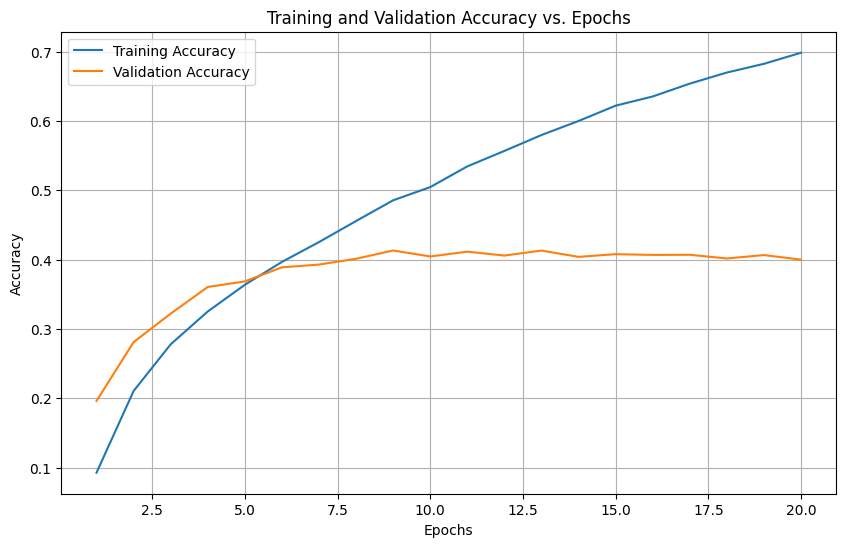

In [59]:
# Your Code Here

import matplotlib.pyplot as plt


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



*This plot indicates the overfitting of data (as with Epoch both training & validation values increases but training accuracy is much higher than validation accuracy)*





313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


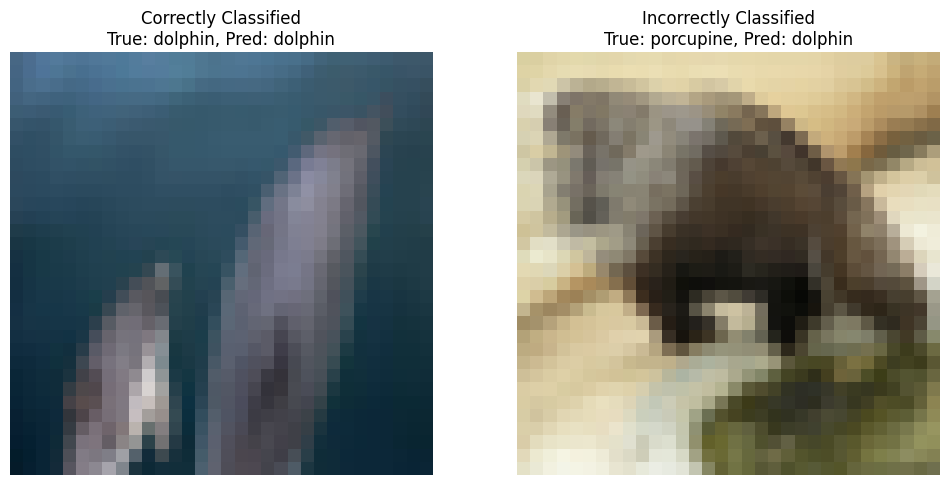

In [71]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(x_val)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)


correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]


correct_idx = correct_indices[0]  # First correct image
incorrect_idx = incorrect_indices[0]  # First incorrect image


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_val[correct_idx])
plt.title(f"Correctly Classified\nTrue: {class_names[y_true_classes[correct_idx]]}, Pred: {class_names[y_pred_classes[correct_idx]]}")
plt.axis('off')

# Plot the incorrect image
plt.subplot(1, 2, 2)
plt.imshow(x_val[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {class_names[y_true_classes[incorrect_idx]]}, Pred: {class_names[y_pred_classes[incorrect_idx]]}")
plt.axis('off')

plt.show()


In [72]:
correct_prob = y_pred[correct_idx]
incorrect_prob = y_pred[incorrect_idx]


print("Correctly Classified Image Probabilities:")
for i, (cls, prob) in enumerate(zip(class_names, correct_prob)):
    print(f"{cls}: {prob:.4f}")


print("\nIncorrectly Classified Image Probabilities:")
for i, (cls, prob) in enumerate(zip(class_names, incorrect_prob)):
    print(f"{cls}: {prob:.4f}")


Correctly Classified Image Probabilities:
apple: 0.0081
aquarium_fish: 0.0115
baby: 0.0071
bear: 0.0114
beaver: 0.0111
bed: 0.0136
bee: 0.0098
beetle: 0.0072
bicycle: 0.0131
bottle: 0.0083
bowl: 0.0105
boy: 0.0081
bridge: 0.0083
bus: 0.0087
butterfly: 0.0060
camel: 0.0065
can: 0.0106
castle: 0.0122
caterpillar: 0.0128
cattle: 0.0118
chair: 0.0110
chimpanzee: 0.0101
clock: 0.0180
cloud: 0.0158
cockroach: 0.0086
couch: 0.0096
crab: 0.0114
crocodile: 0.0090
cup: 0.0104
dinosaur: 0.0115
dolphin: 0.0203
elephant: 0.0115
flatfish: 0.0072
forest: 0.0092
fox: 0.0135
girl: 0.0170
hamster: 0.0072
house: 0.0073
kangaroo: 0.0086
keyboard: 0.0131
lamp: 0.0113
lawn_mower: 0.0085
leopard: 0.0089
lion: 0.0063
lizard: 0.0082
lobster: 0.0097
man: 0.0106
maple_tree: 0.0101
motorcycle: 0.0101
mountain: 0.0144
mouse: 0.0080
mushroom: 0.0047
oak_tree: 0.0108
orange: 0.0107
orchid: 0.0049
otter: 0.0109
palm_tree: 0.0072
pear: 0.0093
pickup_truck: 0.0117
pine_tree: 0.0121
plain: 0.0060
plate: 0.0082
poppy: 0.


*The result shows that for each class it has avg ~0.01 confidence in correctly indentified images*


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(100, activation='softmax'))


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Train the model
new_model = model.fit(
    x_train, y_train,  # Use the normalized images
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[lr_scheduler]
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 173ms/step - accuracy: 0.0976 - loss: 4.1252 - val_accuracy: 0.1968 - val_loss: 3.3575 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 172ms/step - accuracy: 0.2245 - loss: 3.1794 - val_accuracy: 0.2533 - val_loss: 3.0730 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 169ms/step - accuracy: 0.3005 - loss: 2.7642 - val_accuracy: 0.2797 - val_loss: 3.0923 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.3536 - loss: 2.4776 - val_accuracy: 0.3332 - val_loss: 2.6744 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 170ms/step - accuracy: 0.4132 - loss: 2.2347 - val_accuracy: 0.3425 - val_loss: 2.6194 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 177ms/step - accuracy: 0.4541 - loss: 2.0238 - val_accuracy: 0.3769 - val_loss: 2.4641 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 171ms/step - accura

Data Augmentation allows to transform the existing images (either by rotating, shifting, zooming or scaling) to learn more about image & accurately classify the image to correct label.



In [90]:
test_loss, test_accuracy = new_model.model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4556 - loss: 3.1293
Test Accuracy: 0.4547
Test Loss: 3.1485


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

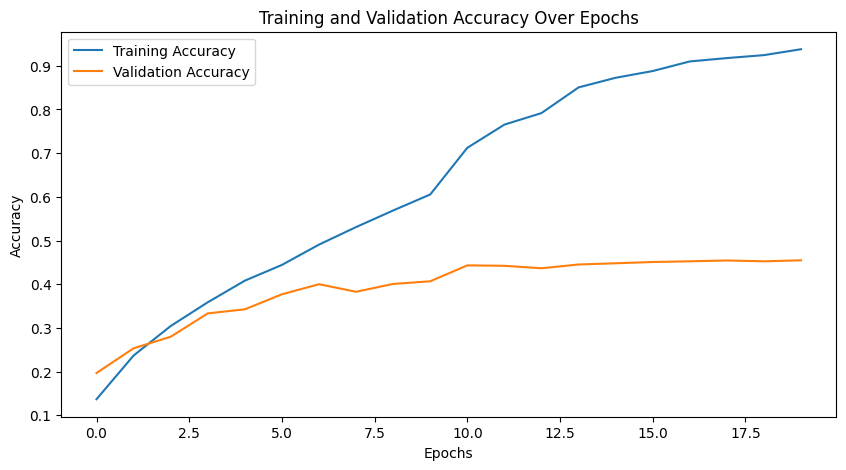

In [91]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(new_model.history['accuracy'], label='Training Accuracy')
plt.plot(new_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


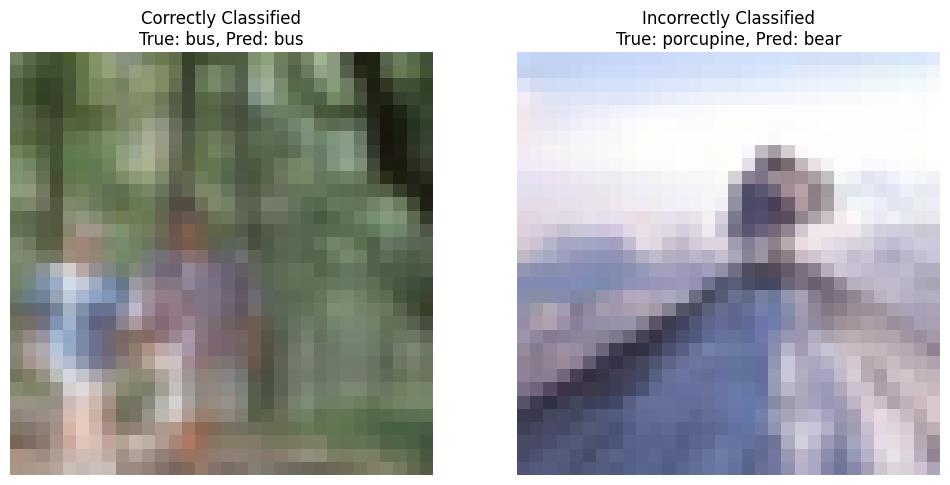

Correctly Classified Image Probabilities:
apple: 0.0000
aquarium_fish: 0.0000
baby: 0.0000
bear: 0.0001
beaver: 0.0000
bed: 0.0000
bee: 0.0000
beetle: 0.0000
bicycle: 0.0000
bottle: 0.0000
bowl: 0.0000
boy: 0.0000
bridge: 0.0052
bus: 0.7513
butterfly: 0.0000
camel: 0.0000
can: 0.0005
castle: 0.0000
caterpillar: 0.0000
cattle: 0.0002
chair: 0.0000
chimpanzee: 0.0009
clock: 0.0005
cloud: 0.0000
cockroach: 0.0000
couch: 0.0083
crab: 0.0000
crocodile: 0.0000
cup: 0.0000
dinosaur: 0.0000
dolphin: 0.0000
elephant: 0.0000
flatfish: 0.0000
forest: 0.0001
fox: 0.0000
girl: 0.0000
hamster: 0.0000
house: 0.0000
kangaroo: 0.0000
keyboard: 0.0000
lamp: 0.0000
lawn_mower: 0.0000
leopard: 0.0000
lion: 0.0000
lizard: 0.0000
lobster: 0.0000
man: 0.0001
maple_tree: 0.0000
motorcycle: 0.0025
mountain: 0.0000
mouse: 0.0000
mushroom: 0.0000
oak_tree: 0.0000
orange: 0.0000
orchid: 0.0000
otter: 0.0000
palm_tree: 0.0000
pear: 0.0000
pickup_truck: 0.0031
pine_tree: 0.0000
plain: 0.0000
plate: 0.0000
poppy: 0.

In [94]:
# Get predictions for the test set
y_pred = new_model.model.predict(x_val)

# Convert the predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Find correctly and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect image
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correct image
plt.figure(figsize=(12, 6))

# Correct image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nTrue: {class_names[y_true_classes[correct_idx]]}, Pred: {class_names[y_pred_classes[correct_idx]]}")
plt.axis('off')

# Incorrect image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {class_names[y_true_classes[incorrect_idx]]}, Pred: {class_names[y_pred_classes[incorrect_idx]]}")
plt.axis('off')

plt.show()

# Get classification probabilities for both correct and incorrect images
correct_prob = y_pred[correct_idx]  # Probabilities for the correct image
incorrect_prob = y_pred[incorrect_idx]  # Probabilities for the incorrect image

# Show the classification probabilities for the correct image
print("Correctly Classified Image Probabilities:")
for i, (cls, prob) in enumerate(zip(class_names, correct_prob)):
    print(f"{cls}: {prob:.4f}")

# Show the classification probabilities for the incorrect image
print("\nIncorrectly Classified Image Probabilities:")
for i, (cls, prob) in enumerate(zip(class_names, incorrect_prob)):
    print(f"{cls}: {prob:.4f}")


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The new model degrades the performance & it's underfitting the result
Future improvement could be adding Adam with different learning rate can provide some better accuracy.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.